# Проблематика ML

В ML существует ряд достаточно общих проблем и понятий, характерных для всех задач и моделей. Часть таких понятий мы сегодня разберём.

##I. Обобщающая способность модели.

Обобщающая способность - это характеристика того, насколько сложные зависимости модель машинного обучения в теории может приближать. Это свойство можно проиллюстрировать на примере задачи регрессии, для решения которой мы используем полиномиальные модели (т.е. строим приближение неизвестной функции при помощи полинома).

Очевидно, целевую функцию, заданную, скажем, полиномом 5 степени, будет очень трудно приблизить полиномом 3 степени, а вот наоброт - довольно просто. В этом смысле обобщающая способность регрессионной полиномиальной модели 3 степени меньше, чем  полиномиальной модели 5 степени.

## Мера обобщающей способности

Концепция обобщающей способности понятна, но остаётся непонятно, как её измерить.

Приведём один пример.

## VC-размерность (Vapnik–Chervonenkis)



### Владимир Наумович Вапник

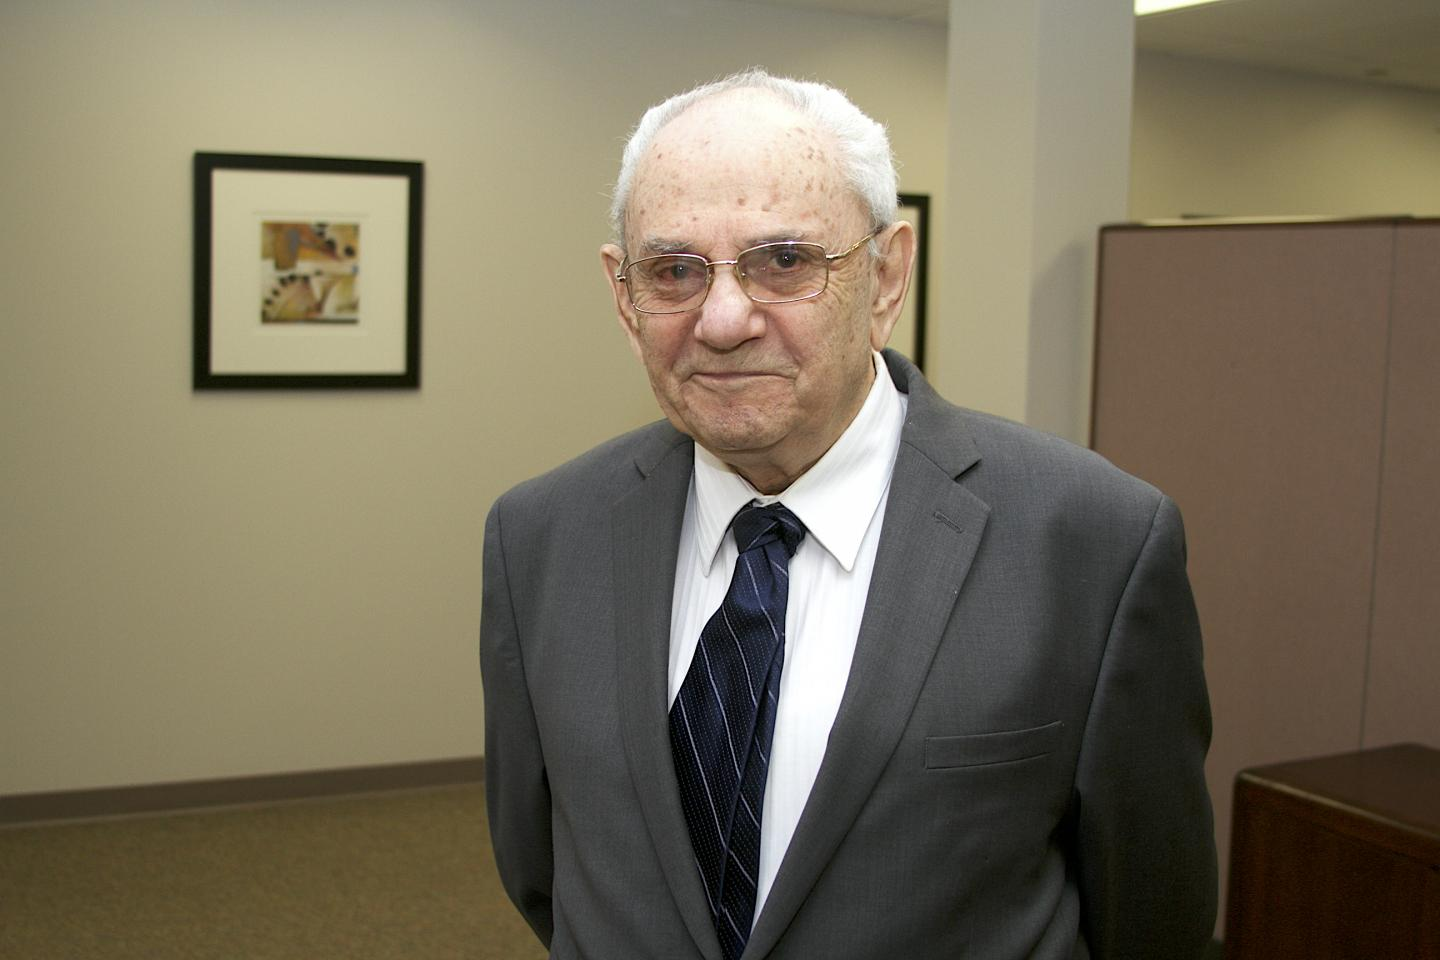

### Алексей Яковлевич Червоненкис

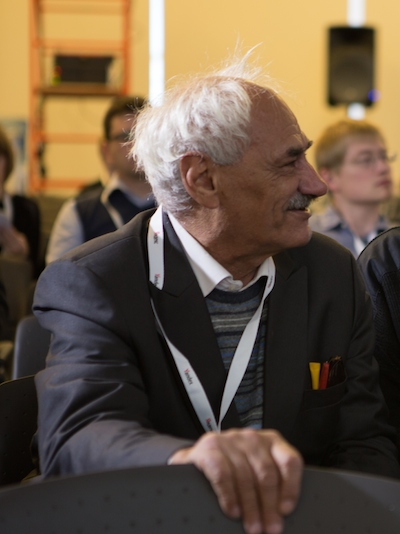

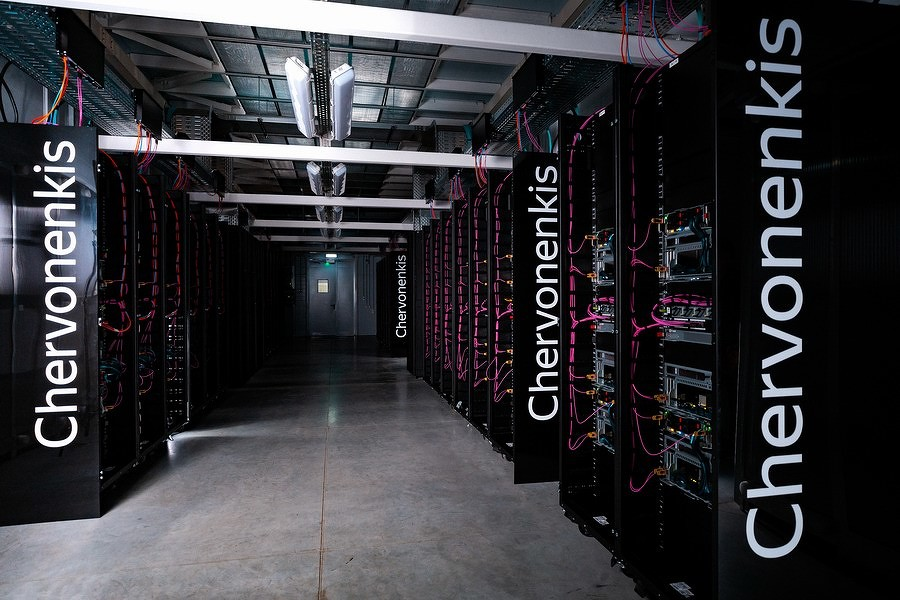

**Определение 1**. Коэффициентом разнообразия множества бинарных функций F = {f: X → {0,1}} на выборке объектов $X^N$ - это мощность множества всевозможных бинарных векторов вида $(f(x_1) ... f(x_N))$
$$Δ(F, X^N) = |{(f(x_1) ... f(x_N)): f∈F}|$$

В каком-то смысле можно воспринимать коэффициент разнообразия, как меру "выразительности" множества функций F.

**Утверждение 1**. $Δ(F, X^N) \leq 2^N$

**Определение 2**. Коэффициент разнообразия семейства алгоритмов A. Пусть Y - конечное множество меток классов. Тогда $a: X → Y$ - некоторый алгоритм приближения неизвестной зависимости $y: X → Y$. Выберем некоторое семейство таких алгоритмов A.

**Коэффициентом разнообразия множества алгоритмов A** называется коэффициент разнообразия множества функций ${f(x) = [a(x)\neq y(x)]: a∈A}$

Например, если мы рассматриваем бинарную классификацию, то коэффициент разнообразия некоторого семейства алгоритмов A - это число всевозможных способов разбиения выборки X на 2 класса при помощи алгоритма из этого семейства.

**Определение  3**. Функцией роста множества алгоритмов A будем называть максимальное значение коэффициента разнообразия семейства A по всевозможным выборкам длины L:
$$Δ^A(L) = \max\limits_XΔ^A(X^L)$$

Функция роста - это характеристика **семейства алгоритмов A**.

**Теорема 1(без док-ва)**. $Δ^A(L) = 2^L$ или растёт полиномиально по L.

**Определение 4**. Если существует h такое, что $Δ^A(h) = 2^h$, но $Δ^A(h+1) < 2^{h+1}$, то это число h называется VC-размерностью семейства алгоритмов A.

**Пример**

Рассмотрим для примера семейство бинарных линейных классификаторов на двумерной плоскости.

Рассмотрим h=2, то есть всевозможные выборки длины 2. Очевидно, всегда найдется линейный классификатор, способный разделить две точки на два класса, какое бы ни было распределение по этим классам. Причем способов такого разделения ровно 4 = $2^2 = 2^h$

Рассмотрим h=3, то есть выборки длины 3. Аналогично, для любого распределения классов найдётся линейный классификатор, способный это разделение реализовать. Всего таких комбинаций $8 = 2^3 = 2^h$.

Рассмотрим h=4. Для любой ли комбинации 4 точек на плоскости с произвольным разбиением на классы найдется линейный классификатор, способный это разбиение осуществить? Оказывается, нет. Имеет место так называема XOR-problem, не позволяющая сделать это в ряде случаев. Постарайтесь придумать контрпример самостоятельно, в конце лекции мы его разберём.

VC-размерность - это мера обобщающей способности алгоритмов. В связи со сложностью практической оценки VC-размерности и сложности восприятия этой характеристики, часто об обобщающей способности алгоритмов говорят в терминах числа обучаемых параметров этих алгоритмов. Эти понятия не эквивалентны.

## II. Недообучение моделей.
В случае, если алгоритм не обеспечивает желательной вероятности ошибки как на тренировочной, так и на тестовой выборках, имеет место проблема недообучения. Недообучение связано с недостаточной обобщающей способностью алгоритма, что в свою очередь зачастую обусловлено излишней простотой выбранной модели.

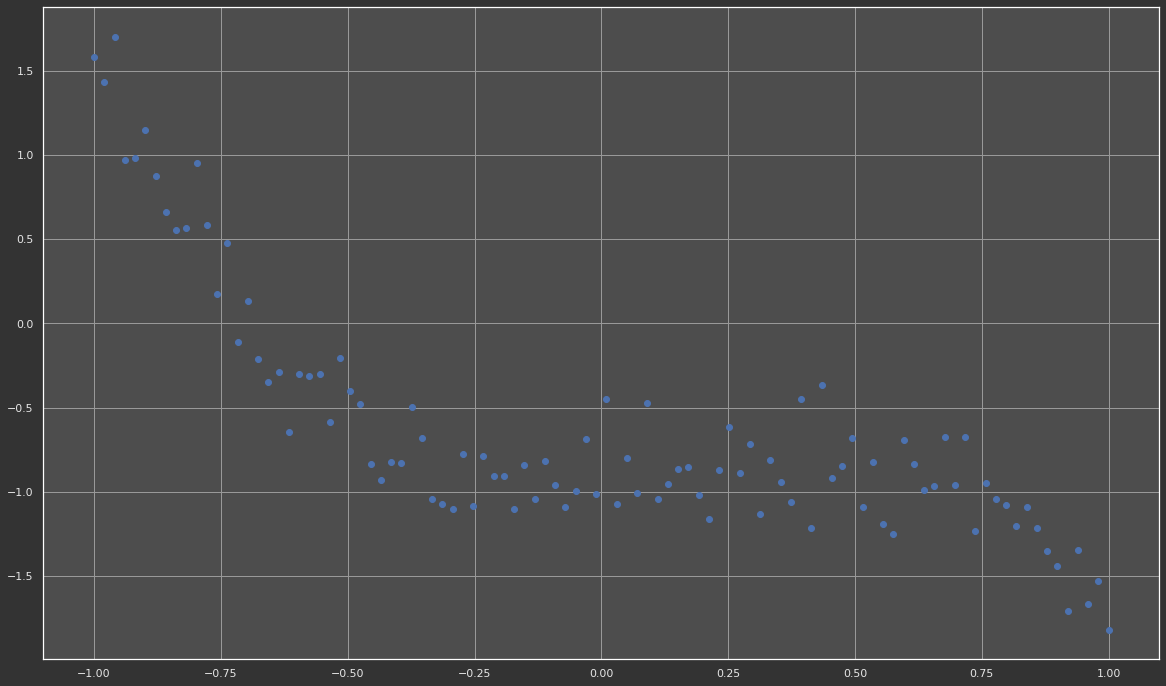

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style({'figure.facecolor': '0.2',
               'axes.facecolor': '0.3',
               'text.color': '0.9',
               'ytick.color': '.9',
               'xtick.color': '.9',
               'grid.color': '.6',
               'axes.labelcolor':'0.9',
               'axes.grid': True
               })
#sns.set_theme()

x = np.linspace(-1, 1, 100)
y = np.polyval([-2,1,0.3,-1], x) + np.random.randn(x.shape[0])*0.2

plt.figure(figsize=(20,12))
plt.scatter(x,y)

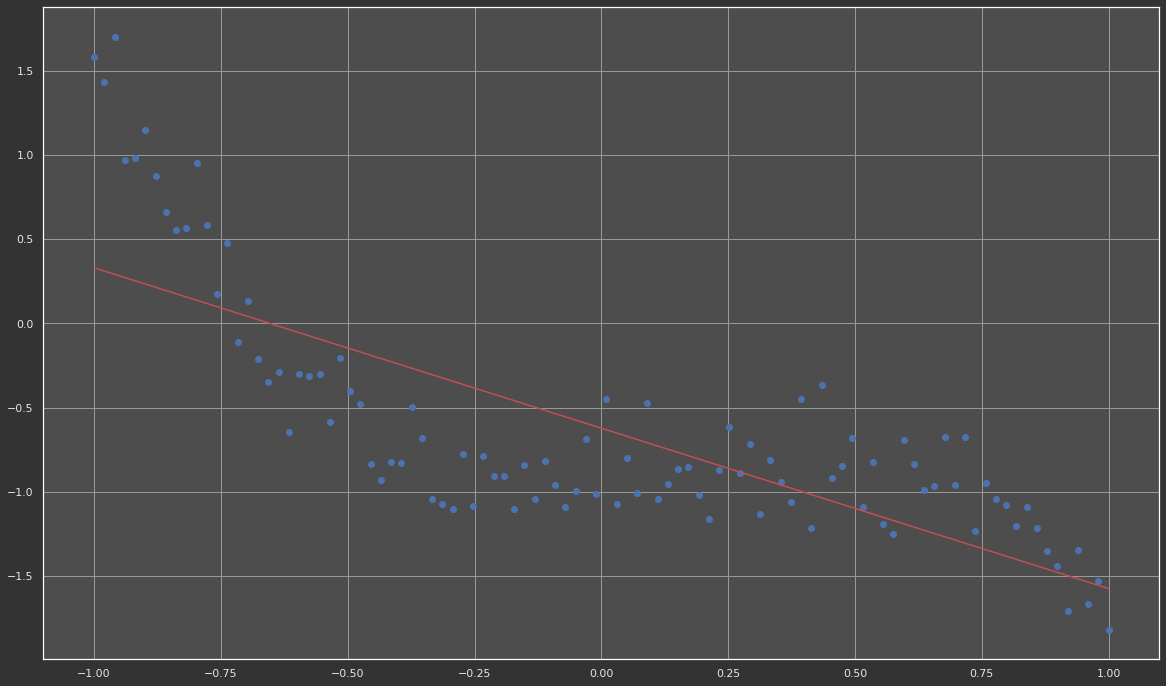

In [ ]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression().fit(x.reshape(-1, 1), y)
preds = LR.predict(x.reshape(-1, 1))

plt.figure(figsize=(20,12))
plt.scatter(x,y)
plt.plot(x, preds, c='r')

Очевидно, что логистическая регрессия с этой задачей не справляется. Всё дело в том, что этой модели банально не хватает параметров для того, чтобы смоделировать слишком сложную зависимость. Это один из возможных примеров ситуации **недообучения**.

Решение проблемы недообучения обычно довольно простое. Достаточно выбрать более сложные модели с большим числом параметров, либо увеличить количество итераций обучения.

Если в приведенном примере мы увеличим число параметров модели, заменив линейную регрессию полиномиальной регрессией третьей степени, мы без труда решим поставленную задачу с достаточно высокой точностью.

## III. Переобучение моделей.

При выборе алгоритма с чрезмерной обобщающей способностью неминуемо наступает ситуация, при которой вероятность ошибки на тестовой выборке существенно выше вероятности ошибки на тренировочной выборке. Переобучение возникает при использовании избыточно сложных моделей.



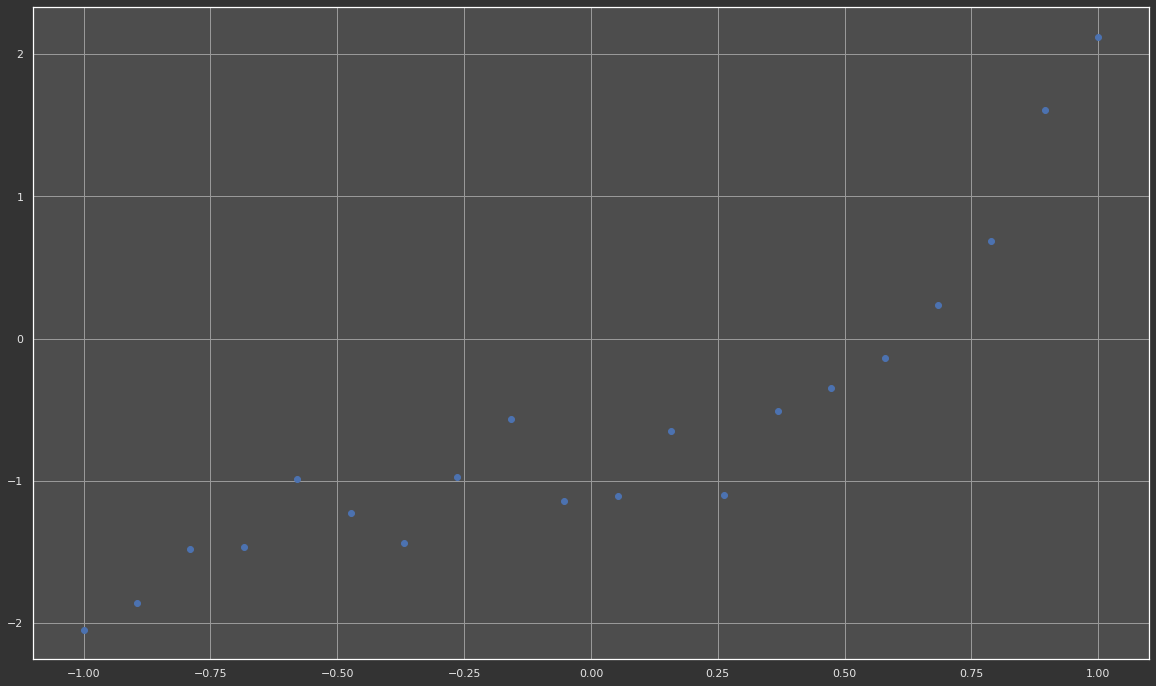

In [ ]:
x = np.linspace(-1, 1, 20)
y = np.polyval([2,1,0.3,-1], x) + np.random.randn(x.shape[0])*0.2

plt.figure(figsize=(20,12))
plt.scatter(x,y)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


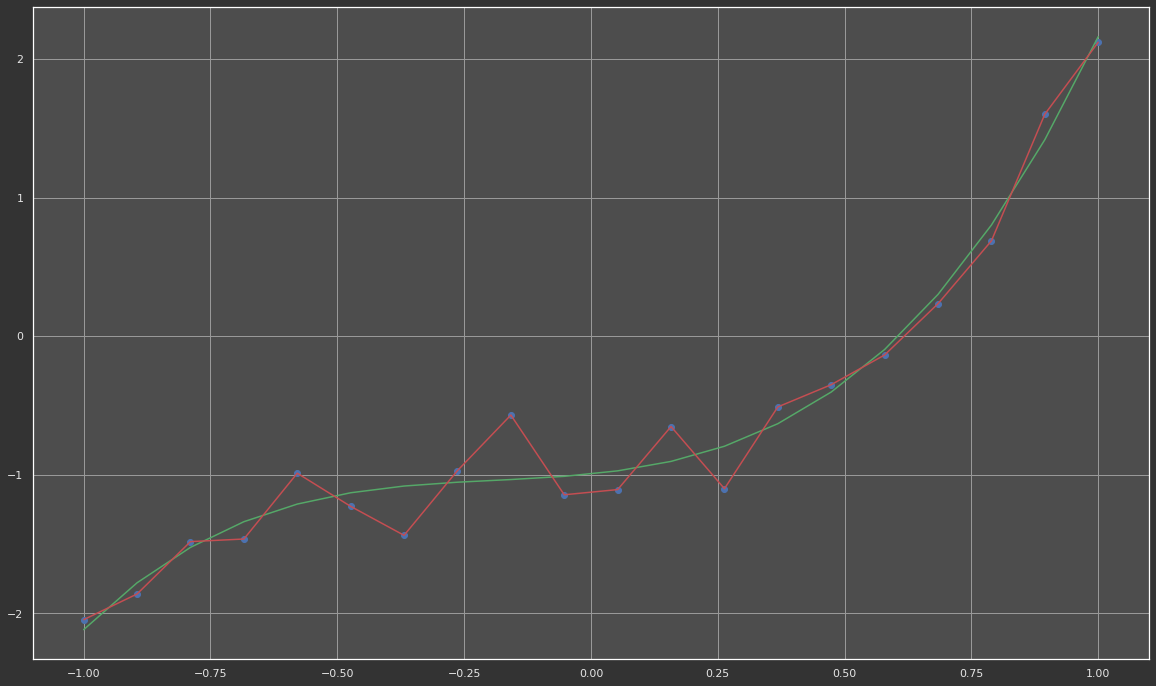

In [ ]:
coef_3 = np.polyfit(x, y, 3)
coef_30 = np.polyfit(x, y, 30)
preds_3 = np.polyval(coef_3,x)
preds_30 = np.polyval(coef_30,x)

plt.figure(figsize=(20,12))
plt.scatter(x,y)
plt.plot(x, preds_3, c='g')
plt.plot(x, preds_30, c='r')

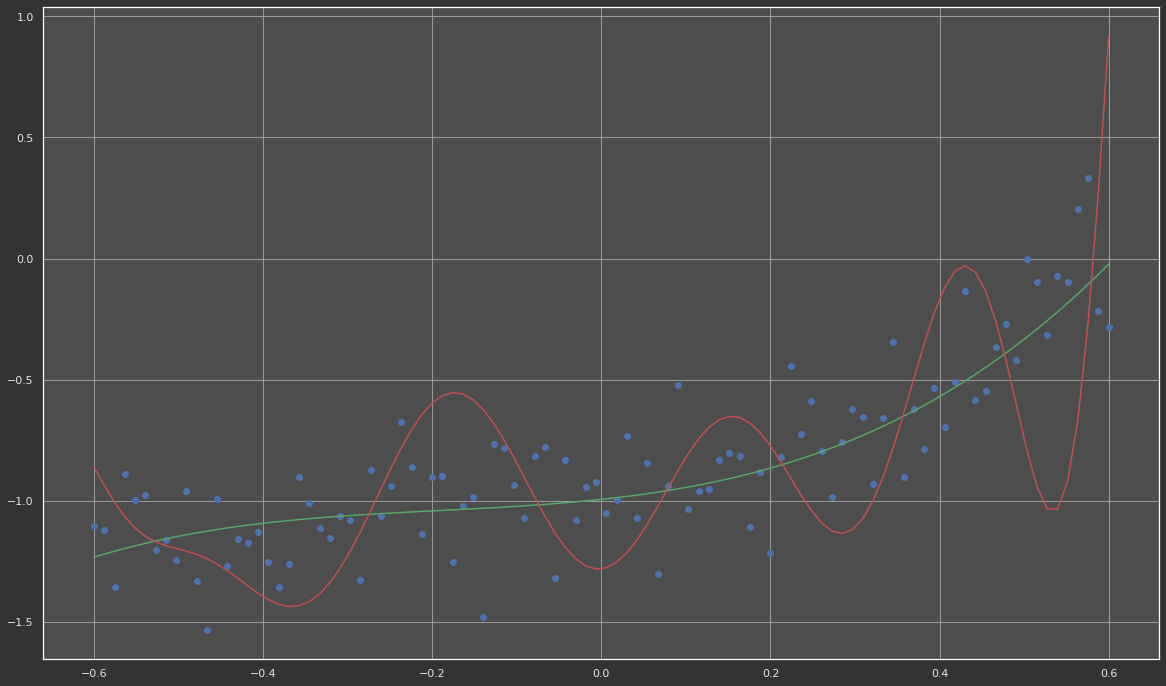

In [ ]:
x_test = np.linspace(-0.6, 0.6, 100)
y_test = np.polyval([2,1,0.3,-1], x_test) + np.random.randn(x_test.shape[0])*0.2

preds_test_3 = np.polyval(coef_3, x_test)
preds_test_30 = np.polyval(coef_30, x_test)

plt.figure(figsize=(20,12))
plt.scatter(x_test, y_test)
plt.plot(x_test, preds_test_3, c='g')
plt.plot(x_test, preds_test_30, c='r')

## IV. Проклятие размерности

Одна из ключевых проблем машинного обучения и наук о данных в целом - проблема высокой размерности данных.

Высокая размерность данных накладывает массу негативных эффектов. Иногда совокупность этих эффектов называют "Проклятием размерности", этот термин приписывается Ричарду Беллману. Обсудим некоторые из них, опираясь в частности на примеры, приведенные Кристофером Бишопом в его книге "Pattern Recognition and Machine Learning".

Представим, что мы хотим построить некоторый алгоритм классификации, способный разделить пространство наших признаковых описаний на некие регулярные ячейки. Под регулярными ячейками здесь подразумевается обобщение куба, ребра которого параллельны осям координат, на пространства любых размерностей. То есть в одномерном случае регулярной ячейкой будет отрезок, в двумерном - квадрат, в трехмерном - куб и тд. Каждая ячейка хранит в себе некоторый набор данных, представленный совокупностью точек тренировочного датасета, попавших в эту ячейку, выбор же класса в каждой ячейке происходит при помощи голосования всех объектов, попавших в эту ячейку. Несложно заметить, что описанный алгоритм представляет собой вариацию решающего дерева.

Можно также заметить, что сложность построения такого алгоритма и его использования будет расти экспоненциально с ростом размерности пространства.

Экспоненциально так же будет расти и сложность любых алгоритмов, основанных на методе "применения грубой силы" (brootforce, так обычно называют алгоритмы, основанные на переборе и подсчете некоторых статистик по всей выборке). Мы не всегда используем в жизни именно такие алгоритмы, однако, во-первых, встречаются они все же довольно часто, а во-вторых, скорость роста сложности других алгоритмов бывает пропорциональна скорости роста сложности brootforce.

Помимо этой проблемы, возникают еще и следующие:

* В случае, когда размерность выборки превышает число объектов в ней, алгоритм неминуемо переобучается. Излишние координаты приводят к переобучению, даже когда размерность ниже, чем мощность выборки.

* Во многих алгоритмах мы прибегаем к понятию расстояния между объектами. Лишние координаты влияют на расстояние, но в случае, когда они не несут полезной информации, они представляют собой шум, сбивающий актуальность измеренного расстояния между объектами.

# Нейронные сети

## Идея 1. Выделение высокоуровневых признаков

Стандартные алгоритмы классического машинного обучения работают с признаками напрямую, делая предсказание непосредственно по набору факторов. Известный пример позволяет продемонстрировать, что иногда требуется сделать ряд дополнительных шагов, выделяя **высокоуровневые** признаки. Этот пример решения задачи ценообразования недвижимости.

![](https://drive.google.com/uc?export=view&id=1mVD6tsamjft8Ysb5qnws62gKWAtz5ziO)

Таким образом, приходим к мысли об объединении нескольких линейных моделей в комбинацию, последовательно выделяющую всё более высокоуровневые признаки.


## Идея 2. XOR-problem


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.RandomState(0)
X1 = rng.randn(50, 2) + np.array([4,4])
X2 = rng.randn(50, 2) + np.array([-4,4])
X3 = rng.randn(50, 2) + np.array([4,-4])
X4 = rng.randn(50, 2) + np.array([-4,-4])
X = np.concatenate([X1,X2,X3,X4])
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

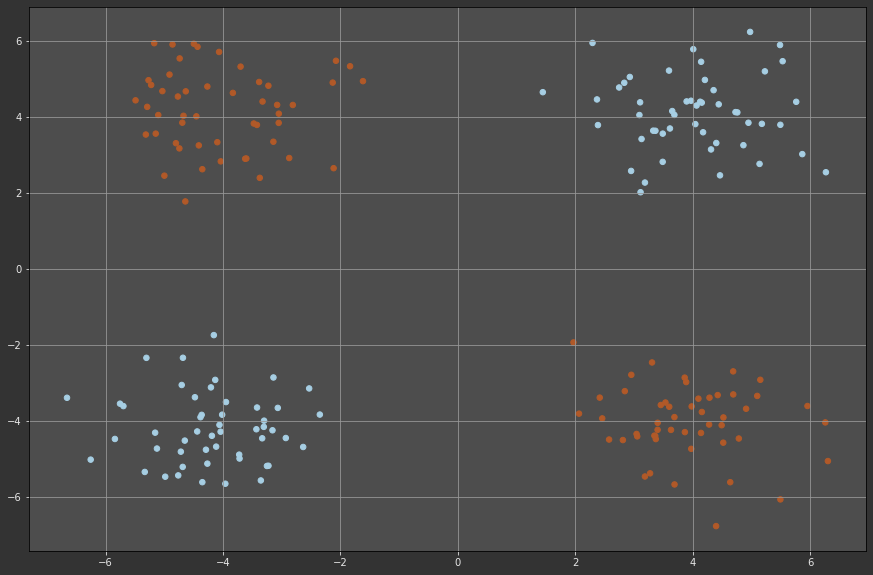

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired);

In [ ]:
def plot_boundary(clf, X, y, plot_title):
  x_mesh, y_mesh = np.meshgrid(np.linspace(-8, 8, 50), np.linspace(-8, 8, 50))
  clf.fit(X, y)
  Z = clf.predict_proba(np.vstack((x_mesh.ravel(), y_mesh.ravel())).T)[:, 1]
  Z = Z.reshape(x_mesh.shape)

  b1 = x_mesh.min()
  b2 = x_mesh.max()
  b3 = y_mesh.min()
  b4 = y_mesh.max()

  image = plt.imshow(Z, interpolation='nearest', extent=(b1, b2, b3, b4), aspect='auto', origin='lower', cmap=plt.cm.PuOr_r)
  contours = plt.contour(x_mesh, y_mesh, Z, levels=[0], linewidths=2, linetypes='--')
  plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired)
  plt.xticks(())
  plt.yticks(())
  plt.axis([-8, 8, -8, 8])
  plt.colorbar(image)
  plt.title(plot_title, fontsize=20);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: No contour levels were found within the data range.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: The following kwargs were not used by contour: 'linetypes'
  del sys.path[0]


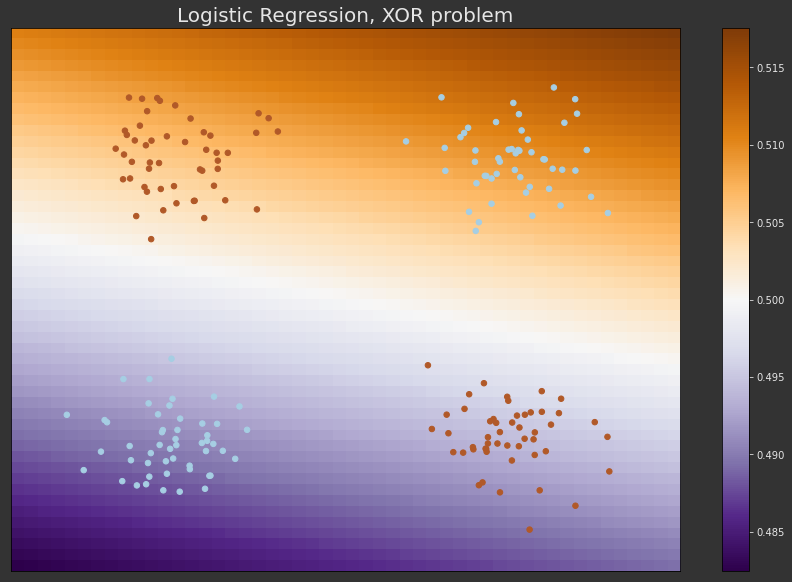

In [ ]:
from sklearn.linear_model import LogisticRegression
plt.figure(figsize=(15,10))
plot_boundary(LogisticRegression(), X, y,
"Logistic Regression, XOR problem")

## Что же делать?

Попробуем объединить три логистические регрессии в следующую конструкцию:
![](https://drive.google.com/uc?export=view&id=194jvppB_xRy_6ZCPfLXc9sTIGyoAk7uA)

In [ ]:
class trinity_of_lr:
  def __init__(self):
    self.lr_1 = LogisticRegression()
    self.lr_2 = LogisticRegression()
    self.lr_3 = LogisticRegression()

  def fit(self, X, y):
    y_1 = (X[:,0] > 0).astype(int) * (X[:,1] < 0).astype(int)
    y_2 = (X[:,0] < 0).astype(int) * (X[:,1] > 0).astype(int)

    self.lr_1.fit(X,y_1)
    self.lr_2.fit(X,y_2)

    probas_1 = self.lr_1.predict_proba(X)
    probas_2 = self.lr_2.predict_proba(X)

    x_3 = np.concatenate([probas_1, probas_2], axis=-1)

    self.lr_3.fit(x_3,y)

  def predict(self, X):
    probas_1 = self.lr_1.predict_proba(X)
    probas_2 = self.lr_2.predict_proba(X)
    x_3 = np.concatenate([probas_1, probas_2], axis=-1)

    preds = self.lr_3.predict(x_3)
    return preds


  def predict_proba(self, X):
    probas_1 = self.lr_1.predict_proba(X)
    probas_2 = self.lr_2.predict_proba(X)
    x_3 = np.concatenate([probas_1, probas_2], axis=-1)

    preds = self.lr_3.predict_proba(x_3)
    return preds

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: No contour levels were found within the data range.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: The following kwargs were not used by contour: 'linetypes'
  del sys.path[0]


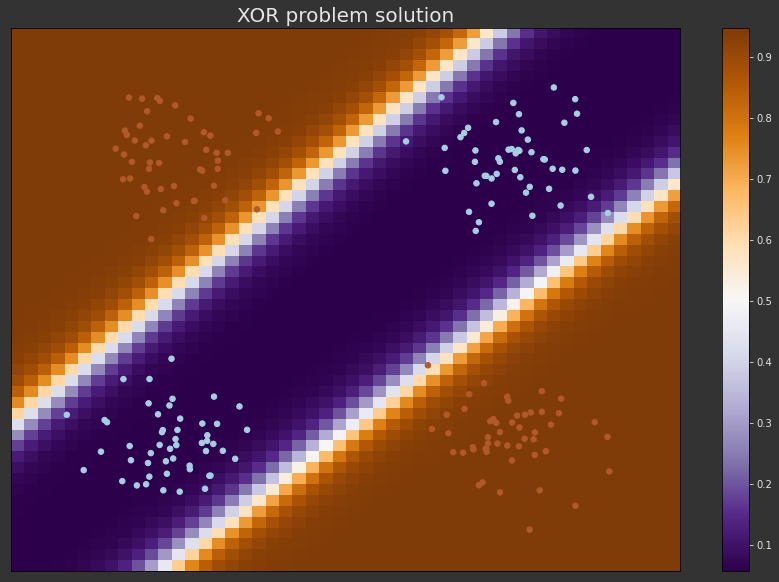

In [ ]:
plt.figure(figsize=(15,10))
plot_boundary(trinity_of_lr(), X, y,
"XOR problem solution")

# Полносвязные нейронные сети

В случае с предложенным решением XOR-problem каждая логистическая регрессия работала независимо от остальных. Что если, нам не стоит обучать каждую из них отдельно, а обучить их как единую модель?

В рамках такой идеи мы получаем новую концепцию:

![](https://drive.google.com/uc?export=view&id=18sVZ-Fned5mQf7WBq6rZcM9fukL7VWdQ)


Таким образом полносвязная нейронная сеть представляет из себя функцию (в общем случае - многомерную) вектора аргументов $\vec{x}$. Эта функция выражается последовательностью линейных матричных преобразований, комбинированных с применением нелинейных функций активации. В общем случае эта функция может быть записана в следующем виде: $$F(\vec{x}) = σ_N(W_N*[σ_{N-1}(W_{N-1}*(...)^T)]^T)$$

Архитектура полносвязной нейросети полностью определяется тремя параметрами:

* Числом матриц N
* Размерностями этих матриц
* Набором функций $σ_i$

Обучаемые параметры же здесь - это матрицы $W_i$

Последняя формула называется формулой *прямого прохода* (forward propagation).

Вопросы на подумать:

1) Зачем вообще нужны функции активации?

2) Каковы размерности матриц $W_i$?

# Алгоритм Backpropagation

Возникает естественный вопрос: как обучить такую сложную модель?
Эта модель может содержать сотни, тысячи, миллионы и даже сотни миллиардов параметров.

Для использования градиентных методов оптимизации нам необходимо научиться считать частные производные некоторой функции. Сделать это напрямую при помощи аналитических выражений или применения аппарата численного дифференцирования не выйдет в силу трудоемкости и сложности вычислений. Для решения этой проблемы предлагается воспользоваться chain rule (правилом дифференцирования сложной функции)

![](https://drive.google.com/uc?export=view&id=1uhbnLBUXqZ60onSA5D65DIzMPL79rTwp)


## Пример применения алгоритма

Рассмотрим пример подсчета градиентов при помощи метода обратного распространения ошибки на основе решения задачи бинарной классификации нейронной сетью с N слоями и функцией активации выходного слоя - сигмоида.

В качестве лосс-функции для определенности будем рассматривать BCE. Напомним, что BCE определяется следующей формулой: $$e = -ylogh - (1-y)log(1-h)$$ где y - настоящая метка, приписанная объекту, а h - это выход модели, "гипотеза".

Итак, рассмотрим L-й слой. Пусть матрица параметров, отнесенная к этому слою обозначена $W_L = (ω_{ij}^{(L)})$, функция активации данного слоя - это $g^{(L)}$ активации этого слоя обозначим за $\vec{a}^{(L)} = (a_i^{(L)})$, а предактивации $\vec{z}^{(L)} = (z_j^{(L)})$. То есть $\vec{a}^{(L)} = g^{(L)}(\vec{z}^{(L)}) = g^{(L)}(W^{(L)}\vec{a}^{(L-1)T})$

Наша задача найти $\frac{\partial{e}}{\partial{w^{(L)}_{ij}}} = \frac{\partial{e}}{∂z_j^{(L)}}\frac{∂z_j^{(L)}}{\partial{w^{(L)}_{ij}}}$

Здесь мы воспользовались правилом дифференцирования сложной функции. Теперь мы вычислим каждую из производных по отдельности.

1) Рассмотрим $\frac{∂z_j^{(L)}}{\partial{w^{(L)}_{ij}}}$

По определению предактиваций z: $$z_j^{(L)} = ∑\limits_{k=1}^{S_{L-1}}ω_{kj}^{(L)}a_k^{(L-1)}$$ Где $S_{L-1}$ - размерность L-1 слоя.
Отсюда очень просто получить производную этого выражения по $w^{(L)}_{ij}$. В силу линейности последнего выражения: $\frac{∂z_j^{(L)}}{\partial{w^{(L)}_{ij}}} = a_i^{(L-1)}$

2) Обозначим $\frac{\partial{e}}{∂z_j^{(L)}} = δ_j^{(L)}$ и выразим его через $δ_i^{(L+1)}$

Пусть мы знаем все $δ_i^{(L)}$

Тогда $δ_i^{(L-1)} = \frac{\partial{e}}{∂z_i^{(L-1)}} = ∑\limits_{k=1}^{S_{L}} \frac{\partial{e}}{∂z_k^{(L)}}\frac{∂z_k^{(L)}}{∂z_i^{(L-1)}}$

Заметим, что $\frac{\partial{e}}{∂z_i^{(L-1)}} = δ_i^{(L)}$

Посчитаем $\frac{∂z_k^{(L)}}{∂z_i^{(L-1)}} = \frac{∂∑\limits_{k=1}^{S_{L-1}}ω_{kj}^{(L)}g^{(l-1)}(z_i^{(L-1)})}{∂z_i^{(L-1)}}$ = $ω_{ik}^{(L)}g'^{(L-1)}(z_i^{(L-1)})$

Заметим, что g - это функция одного аргумента, поэтому знак ' исчерпывающий для описания производной.

Таким образом, $δ_i^{(L-1)} = ∑\limits_{k=1}^{S_{L}}\delta_k^{(L)}ω_{ik}^{(L)}g'^{(L-1)}(z_i^{(L-1)})$

То есть мы выразили $δ_i^{(L-1)}$ через совокупность частных производных функции ошибки по предактивациям слоя L.

В этой формуле нам известны $z_i^{(L-1)}$, так как мы должны были посчитать во время прямого прохода; $ω_{ik}^{(L)}$ - известные текущие приближения параметров;

Остается лишь один вопрос: откуда взять эти самые $\delta_k^{(L)}$?

Посчитаем $\delta_k^{(L)}$ на последнем слое. Так как последний слой содержит всего один нейрон, то посчитать надо только $\delta_1^{(N)}$, где N - номер последнего слоя.

Рассмотрим $\frac{∂e}{∂h} = \frac{∂}{∂h}( -ylogh - (1-y)log(1-h)) =  \frac{h-y}{h(1-h)}$

Поскольку $h = \sigma(z_1^{(N)})$, где σ - это функция сигмоиды,
$$\frac{∂h}{∂z_1^{(N)}} = σ(z_1^{(N)})(1 - σ(z_1^{(N)})) = h(1-h)$$
Тогда
$$\delta_1^{(N)} = \frac{∂e}{∂z_1^{(N)}} = \frac{∂e}{∂h}\frac{∂h}{∂z_1^{(N)}} = h(1-h)\frac{h-y}{h(1-h)} = h-y$$

Таким образом зная $\delta_1^{(N)}$ мы можем пересчитать по выведенной ранее формуле $\delta_i^{(N-1)}$, затем $\delta_i^{(N-2)}$ и так далее